# Bayesian Lasso

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Example 1: We simulated n = 20 data set to fit models and n = 200 data set
to compare prediction errors of proposed models with eight predictors. We let
$β = (3, 1.5, 0, 0, 2, 0, 0, 0)′$ and $σ = 3$. The pairwise correlation between $x_i$ and $x_j$
was set to be $corr(i, j) = 0.5^{|i−j|}$

In [2]:
# Parameters
n_train = 20  # Number of training samples
n_test = 200  # Number of testing samples
p = 8         # Number of predictors
beta = np.array([3, 1.5, 0, 0, 2, 0, 0, 0])  # True coefficients
sigma = 3     # Standard deviation of noise
correlation_decay = 0.5

# Create covariance matrix based on corr(i, j) = 0.5^|i-j|
cov_matrix = np.fromfunction(
    lambda i, j: correlation_decay ** np.abs(i - j),
    (p, p),
    dtype=int
)

# Generate training predictors (X) and noise
X_train = np.random.multivariate_normal(mean=np.zeros(p), cov=cov_matrix, size=n_train)
epsilon_train = np.random.normal(loc=0, scale=1, size=n_train)

# Generate training response (y)
y_train = X_train @ beta + sigma * epsilon_train

# Generate testing predictors (X) and noise
X_test = np.random.multivariate_normal(mean=np.zeros(p), cov=cov_matrix, size=n_test)
epsilon_test = np.random.normal(loc=0, scale=1, size=n_test)

# Generate testing response (y)
y_test = X_test @ beta + sigma * epsilon_test

# Output data
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (20, 8) (20,)
Testing data shape: (200, 8) (200,)


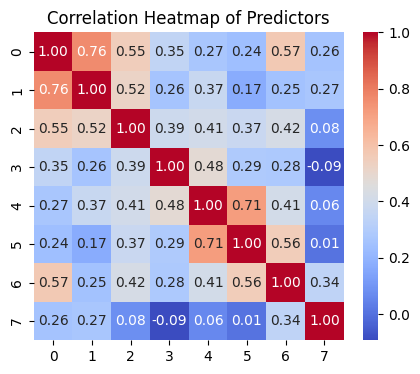

In [3]:
# Calculate correlation matrix for predictors
corr_matrix = np.corrcoef(X_train, rowvar=False)

# Create heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Predictors")
plt.show()


In [11]:
# Example: Fit a simple linear regression model for demonstration
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(lr.intercept_)
print(lr.coef_)
# # Plot true vs predicted
# plt.plot(y_test, label="True Values", alpha=0.7)
# plt.plot(y_pred, label="Predicted Values", alpha=0.7)
# plt.legend()
# plt.title("True vs. Predicted Values")
# plt.xlabel("Sample Index")
# plt.ylabel("Response (y)")
# plt.show()


-1.1597339184184448
[ 2.86413172  2.32996855  0.19551194  0.45393815  0.876717    0.46864407
 -0.02244286  0.82301109]
